### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the final section of this lesson.


(1) What is the independent variable? What is the dependent variable?

Independent variable:-independent variable, sometimes called an experimental or predictor variable, is a variable that is being manipulated in an experiment in order to observe the effect on a dependent variable, sometimes called an outcome variable.

Dependent variable:-It is dependent on another variable .It depends on another factor.

Eg:-Recognition of color of ink is depdendent on color of ink from which is it has written.This is called stroop effect.People will be able to color of ink more clearly if it is written in same color.

Congruent stimuli are those in which the ink color and the word refer to the same color.

Incongruent stimuli are those in which the ink color and the word refer to the differ color.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Null hypothesis (H0)

The null hypothesis states that a population parameter is equal to a value. The null hypothesis is often an initial claim that researchers specify using previous research or knowledge.

Alternative Hypothesis (H1)

The alternative hypothesis states that the population parameter is different than the value of the population parameter in the null hypothesis. The alternative hypothesis is what you might believe to be true or hope to prove true.

Hypothesis to determine whether a population mean, μ, is equal to some target value μ0 include the following:

Ho: μ = μ0

H1: μ < μ0 (a lower-tailed test) or

H1: μ > μ0 (a upper-tailed test) or

H1: μ ≠ μ0 (a two-tailed test)

Hypothesis to determine whether one population mean, μ1 is equal to different population mean μ2 include the following:

H0: μ1 = μ2

H1: μ1< μ2 or

H1: μ1> μ2 or

H1: μ1≠ μ2


2b)

In [1]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    # Perform the analysis here
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np

%matplotlib inline

df=pd.read_csv('stroopdata.csv')
df.head()


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
df.shape

(24, 2)

In [3]:
df['Congruent'].mean(),df['Incongruent'].mean()

(14.051124999999999, 22.015916666666666)

In [4]:
df['Congruent'].std(),df['Incongruent'].std()

(3.5593579576451955, 4.7970571224691376)

We will use Dependent  T-test 

(1) we do not know the population standard deviation

(2) our sample size < 30, and

(3) the samples from one trial is used in the second trial (same participant is used to test the effect of the conditions - repeated measure),



NULL Hyphothesis:-We believe both congruent and incongruent will take same time to recognize

Alternative hyphohthesis :-We believe congruent and incogruent will not take same time to recognize



(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [52]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


We can see that mean of congruent is 14.05 and mean of Incongruent is 22.015.

So congruent words will take less time to recognize the ink since word name and color of ink are same

Incongruent word will take more time to recognize because the color of ink and word name are different

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

(array([ 4.,  2.,  4.,  1.,  6.,  2.,  2.,  1.,  1.,  1.]),
 array([  8.63  ,   9.9998,  11.3696,  12.7394,  14.1092,  15.479 ,
         16.8488,  18.2186,  19.5884,  20.9582,  22.328 ]),
 <a list of 10 Patch objects>)

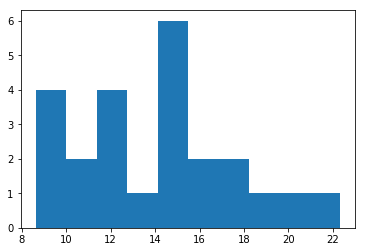

In [53]:
plt.hist(df['Congruent'])

Answer:-
We can see the most of congruent are between 14 and 16 .There are less number of congruent between 18 to 22

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [54]:
df.head()


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


 bootstrapping approach to simulate the results of a traditional hypothesis test.

In [6]:
cong_mean=df['Congruent'].mean()
incong_mean=df['Incongruent'].mean()
actual_diff=cong_mean-incong_mean
actual_diff

-7.9647916666666667

In [5]:
df['intercept']=1
diff_min=[]
for _ in range(10000):
    boot_sample=df.sample(df.shape[0],replace=True)
    cong_mean=boot_sample['Congruent'].mean()
    incong_mean=boot_sample['Incongruent'].mean()
    diff_min.append(cong_mean-incong_mean)

In [7]:
print("Proportion greater:{}".format((np.array(diff_min)>actual_diff).mean()),end="\r")

Since p-value>0.05 .So we will reject the null hyphothesis.

NULL Hyphothesis:-We believe both congruent and incongruent will take same time to recognize

Alternative hyphohthesis :-We believe congruent and incogruent will not take same time to recognize

p-value=0.5087
So There is significant time difference to recognize congruent and incongruent ink




(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--